## Comision 22740 DataScience
## Tutor: Juan Felipe Gonzalez Sanmiguel
### Desafio entregable: Primera entrega de trabajo final

#### Importe de bibliotecas

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import boxplot
from seaborn import violinplot
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
sns.set(rc = {'figure.figsize':(20,15)})

import missingno as msno
import sqlite3

## Data Acquisition
#### Indicación de la fuente del Dataset y los criterios de selección.

- Realizamos una investigación por diferentes páginas afines a la ciencia de datos realizando una primera selección de Datasets con caracteristicas necesarias para realizar el trabajo de este curso. En esta instancia cada integrante tuvo via libre a su imaginación. 


- De todos los encontrados realizamos una segunda selección teniendo en cuenta diferentes parametros como:
    - Tema a tratar: Debe ser interesante para los 3 integrantes del grupo.
    - Objetivo y resultados: El Dataset debe permitir realizar un análisis completo.
    - Datos suficientes: El dataset debe contener muchos atributos y registros para facilitar el aprendizaje de nuestros algoritmos de Machine Learning.
    - Originalidad: El tema a tratar debe ser original en la comisión.
    - Calidad: El trabajo finalizado debe ser de calidad. Para poder formar parte de nuestro Portfolio.
    

- Nos decidimos a trabajar sobre el tema viviendas. Un dataset que cuenta con 2930 registros y 80 atributos. Los atributos corresponden a diferentes caracteristicas de cada vivienda.
    - https://www.kaggle.com/prevek18/ames-housing-dataset

#### Carga del dataset del proyecto

In [2]:
#Leemos el csv y lo cargamos a un DataFrame. Utilizamos columna PID como index.
df = pd.read_csv('Ames_Housing_Data.csv', index_col="PID")
#Utilizamos esta función para que nos muestre todas las columnas. Sino solo muestra un porcentaje de ellas.
pd.options.display.max_columns = None
#Realizamos visualización de una muestra aleatoria de 10 datos.
df.sample(10)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907414080,60,RL,64.0,8633,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,193.0,Unf,0.0,545.0,738.0,GasA,Ex,Y,SBrkr,738,738,0,1476,1.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2005.0,Fin,2.0,540.0,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,173500
527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,931.0,LwQ,153.0,0.0,1084.0,GasA,TA,Y,SBrkr,1084,793,0,1877,1.0,0.0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1974.0,Unf,2.0,488.0,TA,TA,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,178900
527145090,120,RL,39.0,5070,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,1280.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,8,2008,WD,Normal,180000
903235020,30,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,7,1921,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,616.0,Unf,0.0,0.0,616.0,GasA,Gd,Y,SBrkr,616,0,0,616,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1921.0,Unf,1.0,205.0,TA,TA,Y,0,0,129,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,89000
535325090,20,RL,71.0,8540,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,8,1956,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,114.0,ALQ,691.0,120.0,925.0,GasA,TA,Y,SBrkr,925,0,0,925,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1956.0,Unf,1.0,252.0,TA,TA,Y,152,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,127000
903204095,40,RM,50.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,742.0,742.0,GasA,TA,Y,FuseA,779,0,156,935,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1988.0,Unf,1.0,308.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,Shed,600,8,2008,WD,Normal,79500
528290090,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
906392090,20,RL,90.0,13377,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1576.0,Unf,0.0,260.0,1836.0,GasA,Gd,Y,SBrkr,1846,0,0,184

#### Diccionario del Dataset:
    - PID: Indicador unico de vivienda.
    - MS SubClass: Identifica tipo de vivienda. 
    - MS Zoning: Identifica la clasificación de la zona donde se encuentra la vivienda.
    - Lot FrontAge: Frente de la casa, medido en pies lineales.
    - Lot Area: Area del terreno, medido en pies cuadrados.
    - Street: Tipo de calle para acceso a vivienda.
    - Alley: Tipo de entrada para el acceso a la vivienda.
    - Lot Shape: Forma del terreno de la propiedad.
    - Land Contour: Llanura de la propiedad.
    - Utilities: Servicios disponibles de la propiedad.
    - Lot config: Configiración del lote.
    - LandSlope: Pendiente de la propiedad.
    - Neighborhood: Barrio.
    - Condition1: Condiciones de proximidad a puntos de interes.
    - Condition2: Condiciones de proximidad a puntos de interes adicional, si es que las hay.
    - BldgType: Tipo de vivienda.
    - House Style: Estilo de vivienda.
    - Overall Qual: Valoración de calidad general y terminaciones de la vivienda.
    - Overall Cond: Valoración de la condición general de la vivienda.
    - Year Built: Año de construcción de la vivienda.
    - Year Remod Add: Dato de remodelación, si es que existe. Sino mismo año de construcción de la vivienda.
    - Roof Style: Tipo de techo.
    - Roof Matl: Materiales de construcción del techo.
    - Exterior1st: Revestimiento exterior de la casa.
    - Exterior2st: Revestimiento exterior de la casa, si hay mas de uno.
    - MasVnrType: Tipo de chapa de mampostería.
    - MasVnrArea: Área de revestimiento de mampostería en pies cuadrados.
    - Exter Qual: Valoración de la calidad de los materiales de exterior.
    - Exter Cond: Valoración de la condición general de los materiales de exterior.
    - Foundation: Tipo de cimientos.
    - BsmtQual: Evaluación de la altura del sótano.
    - BsmtCond: Evaluación del estado general del sótano.
    - BsmtExposure: Evaluación de las paredes linderas con vecinos y calle.
    - BsmtFinType1: Evaluación de el estado de terminación del piso 1.
    - BsmtFinSF1: Medición Pies cuadrados terminados en Piso 1.
    - BsmtFinType2: Evaluación de el estado de terminación del piso 2, si es que los hay.
    - BsmtFinSF2: Medición Pies cuadrados terminados en Piso 2.
    - BsmtUnfSF: Pies cuadrados sin terminar del área del sótano.
    - TotalBsmtSF: Pies cuadrados totales del área del sótano.
    - Heating: Tipo de calefacción.
    - HeatingQC: Calidad de la calefacción.
    - CentralAir: Aire acondicionado.
    - Electrical: Tipo de sistema eléctrico.
    - 1stFlrSF: Pies cuadrados de piso 1.
    - 2stFlrSF: Pies cuadrados de piso 2.
    - LowQualFinSF: Metros cuadrados acabados de baja calidad (todos los pisos)
    - GrLivArea: Pies cuadrados de superficie habitable sobre el nivel del suelo (no cuenta sotano).
    - BsmtFullBath: Baños completos en sótano.
    - BsmtHalfBath: Baños chicos en sótano.
    - FullBath: Baños completos sobre el suelo.
    - Halfbath: Baños chicos sobre el suelo.
    - Bedrooms: Cantidad de dormitorios sobre el suelo.
    - Kitchen: Cantidad de cocinas.
    - KitchenQual: Calidad de las cocinas.
    - TotRmsAbvGrd: Cantidad de habitaciones sobre el nivel del suelo (no incluye baños).
    - Functional: Funcionalidad de la casa.
    - Fireplaces: Cantidad de chimeneas.
    - FireplaceQu: Calidad de las chimeneas.
    - GarageType: Tipo de garage.
    - GarageType: Año de construcción de garage.
    - GarageFinish: Evaluación de terminación del garage.
    - GarageCars: Capacidad de vehiculos por garage.
    - GarageArea: Area en pies cuadrados de garage.
    - GarageQual: Calidad del garage.
    - GarageCond: Condicion general del garage.
    - PavedDrive: Entrada pavimentada a garage.
    - WoodDeckSF: Deck de madera en pies cuadrados.
    - OpenPorchSF: Porche abierto de entrada a la vivienda, en pies cuadrados.
    - EnclosedPorch: Porche cerrado de entrada a la vivienda, en pies cuadrados.
    - 3SsnPorch: Porche de tres estaciones, en pies cuadrados.
    - ScreenPorch: Porche estilo ventana, en pies cuadrados.
    - PoolArea: Area de la pileta, en pies cuadrados.
    - PoolQC: Calidad de la pileta, en pies cuadrados.
    - Fence: Tipo de cerco.
    - MiscFeature: Característica miscelánea no cubierta en otras categorías.
    - MiscVal: Valoración en dinero de la caracteristica miscelánea.
    - MoSold: Mes que fue vendido.
    - MoSold: Año que fue vendido.
    - SaleType: Tipo de venta.
    - SaleCondition: Condición de la venta.
 
 - Para más detalles referirse al diccionario adjunto al proyecto.
    
    

## Data Wrangling

- Consiste en la manipulación, limpieza y unificación de conjuntos de datos complejos y desordenados para facilitar su acceso, análisis y modelado. El proceso incluye convertir y mapear los datos crudos, y dejarlos en un formato más adecuado para su uso.
- Tenemos consideración especial es este apartado ya que entendemos que aproximadamente el 60% del esfuerzo de un trabajo de Data Science consiste en Data Wrangling. 
- Las etapas se componen en descubrimiento, estructuración, limpieza, enriquecimiento, validación, pubicación.

### + Descubrimiento y estructuración: Analizamos la estructura del dataset
- Comprender los datos, la estructura, tipos y calidad.

In [3]:
#Shape o Forma del dataset. 
#Cuenta con 2930 registros (viviendas) y 80+1 columnas (atributos de las viviendas).
#La primer columna llamada PID es un indicador unico que lo utilizamos como index.
df.shape

(2930, 80)

In [4]:
#Obtenemos informacion de las columnas de datos.
#La función info nos permite saber si existen datos nulos y que tipo de dato es cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 526301100 to 924151050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  O

<AxesSubplot:>

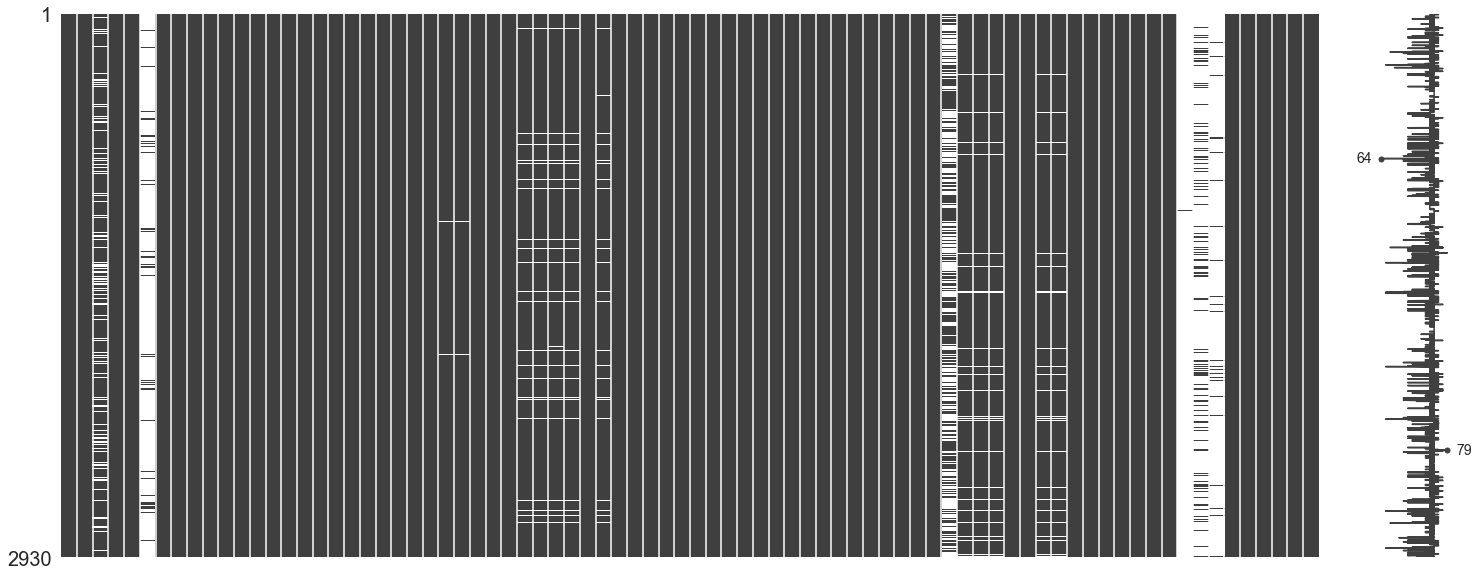

In [5]:
#Utilizacion de libreria missingno para visualizar valores NULL.
msno.matrix(df)

<AxesSubplot:>

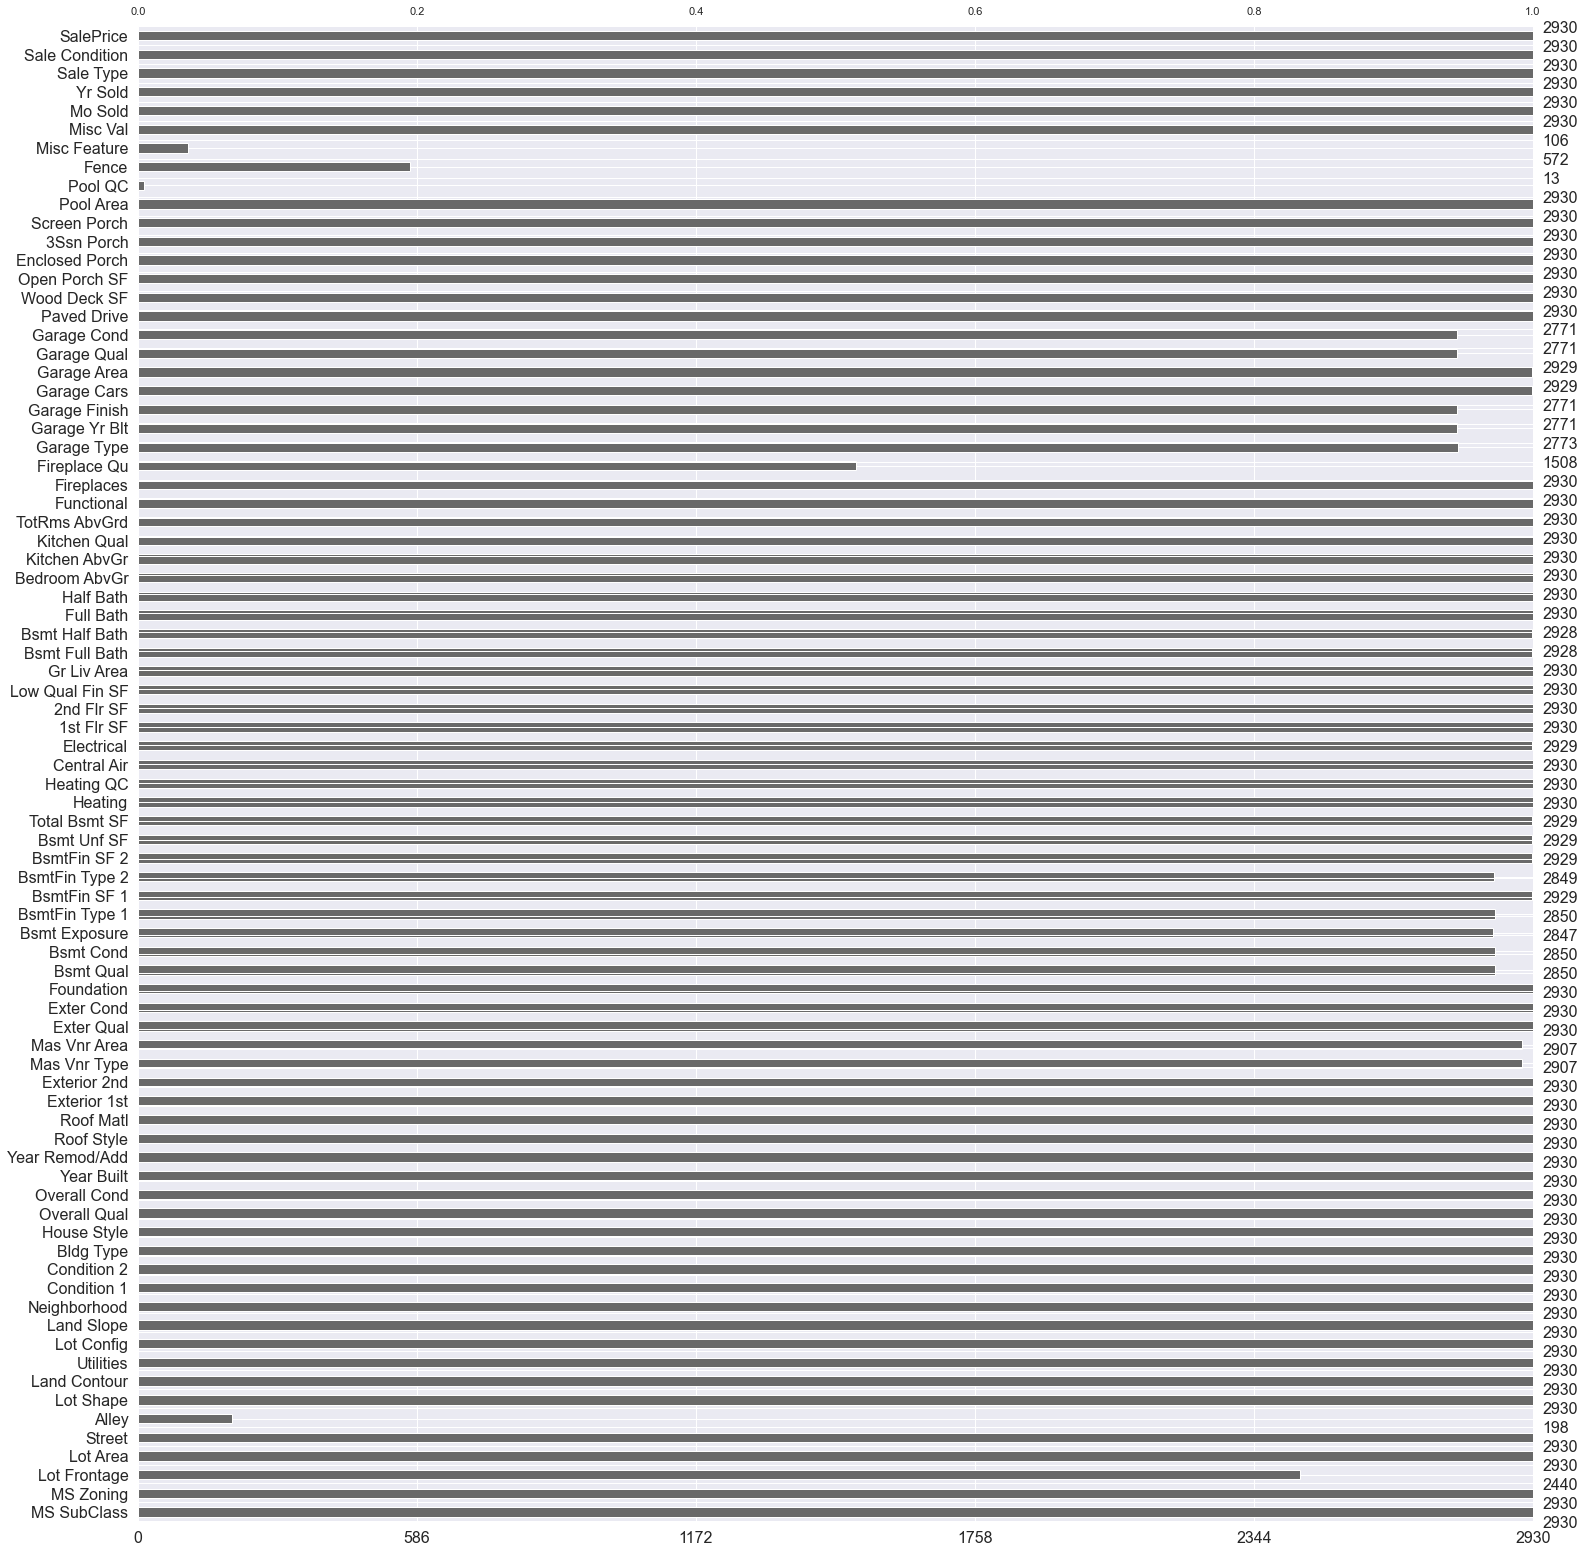

In [6]:
msno.bar(df)

### Notas:
- 2930 registros de viviendas.
- 80 columnas con atributos de cada vivienda. 1 columna adicional PID con número identificatorio único de vivienda.
- Tipos de dato: 
    - 43 del tipo Object.
    - 11 del tipo Float.
    - 26 del tipo Int64.
- Valores nulos:
    - 53 columnas con datos completos (2930 not null).
    - 21 columnas con datos completos <95% (2771 a 2929 not null).
    - 1 columna con la mitad de datos faltantes (1508 not null).
    - 4 columnas con muchos datos null. Porcentaje de datos faltantes 80% (13 a 572 not null).

### + Limpieza de datos
- Realizamos limpieza de datos teniendo consideración en:
    - Outliers data.
    - Missing data.

### Outliers Data
- Para detectar outliers podemos utilizar gráficos del tipo BoxPlot y scatterplot.
- Lo primero que hacemos es detectar las correlaciones más fuertes con el output SalePrice.
- Centraremos nuestros esfuerzos en quitar los outliers de las 3 correlaciones mas fuertes con SalePrice (Overall Qual, Gr Liv Area y Garage Cars).

In [7]:
df.corr()['SalePrice'].sort_values()

Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0.706780
Overall Qual       0

#### Outliers de Overall Qual vs SalePrice

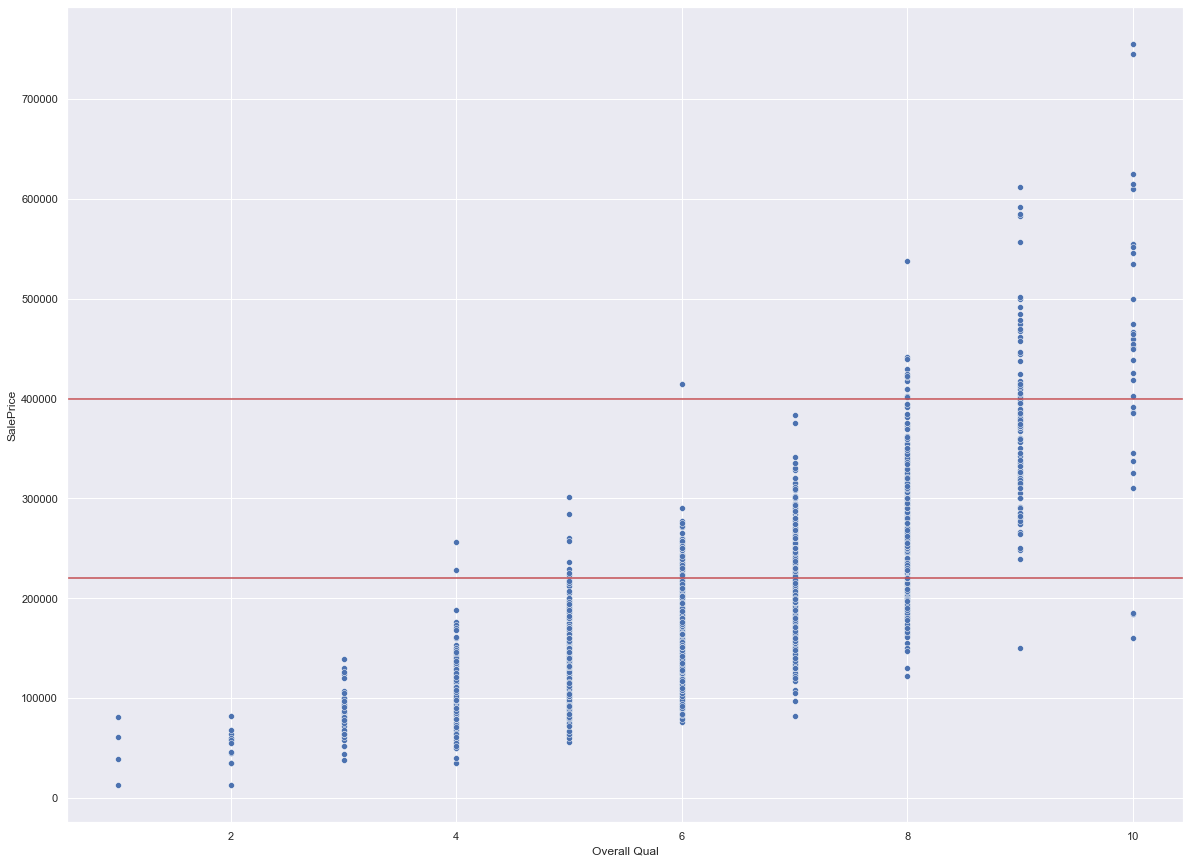

In [8]:
#plt.figure(figsize=(12,6))
sns.scatterplot(data=df , x='Overall Qual',y='SalePrice')
plt.axhline(y=220000,color='r')
plt.axhline(y=400000,color='r')
plt.axhline(y=500000,color='r')

#### Nota:
- Podemos ver que para Overall Qual = 9 y 10 tenemos viviendas con Saleprice > 220.000 usd. Es probable que sean un error de carga de datos ya que mucha calidad con precios muy baratos no corresponde.
- Observamos que existen valores outliers por fuera del rango normal en:
    - Overquall = 6 y SalePrice > 400.000
    - Overquall = 8 y SalePrice > 500.000
    - Overquall = 9 y SalePrice < 220.000

In [9]:
df[(df['Overall Qual']>8)&(df['SalePrice']<220000)][['Overall Qual','SalePrice']]

,Overall Qual,SalePrice
PID,,
533350090,9,150000
908154235,10,160000
908154195,10,183850
908154205,10,184750


In [10]:
df[(df['Overall Qual']==6)&(df['SalePrice']>400000)][['Overall Qual','SalePrice']]

,Overall Qual,SalePrice
PID,,
905427030,6,415000


In [11]:
df[(df['Overall Qual']==8)&(df['SalePrice']>500000)][['Overall Qual','SalePrice']]

,Overall Qual,SalePrice
PID,,
527216070,8,538000


#### Outliers de Gr Liv Area vs SalePrice

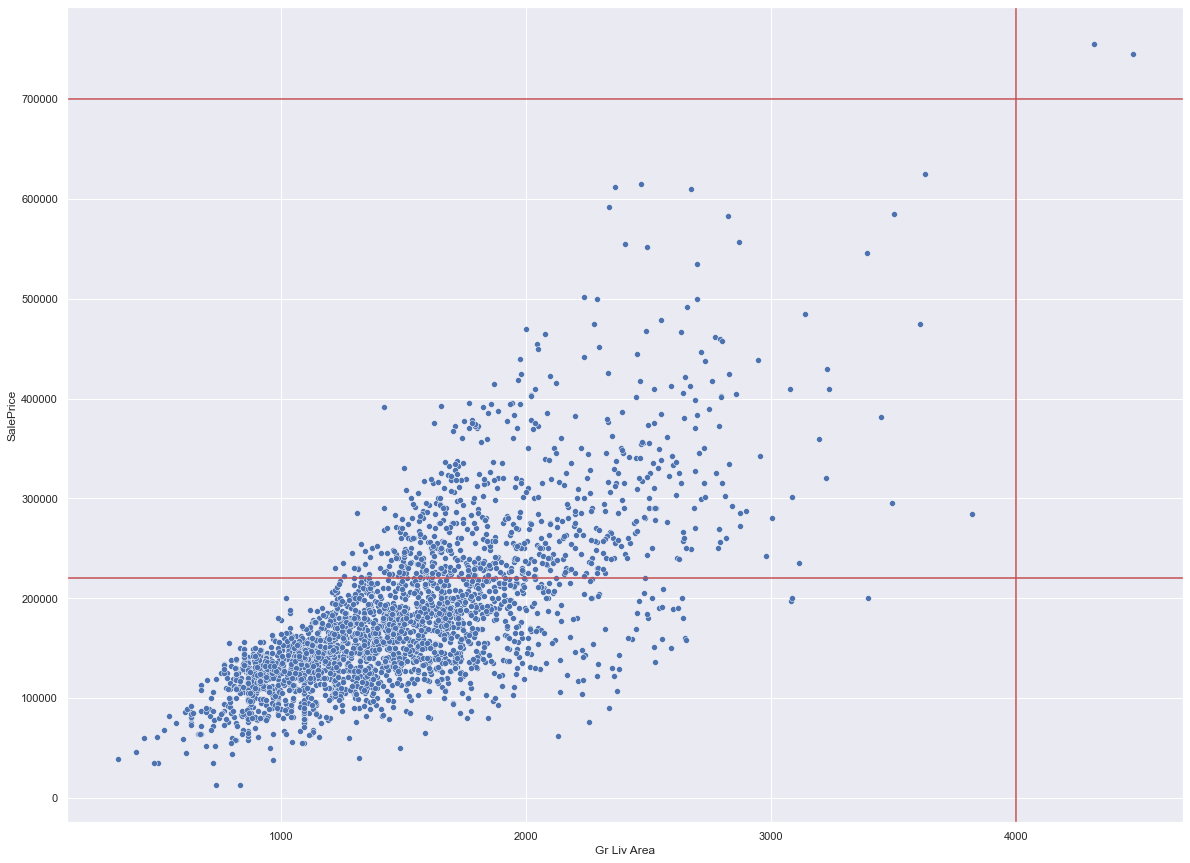

In [13]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.axhline(y=220000, color='r')
plt.axvline(x=4000, color='r')
plt.axhline(y=700000, color='r')

#### Nota:
- Realizamos un ScatterPlot. Trazamos linea vertical Gr Liv Area = 4000 y linea horizontal SalePrice = 220000.
- Observamos en el cuadrante inferior derecho 3 items. Viviendas con demasiado area y poco valor.
- Observamos en el cuadrante superior derecho 2 items. Viviendas con demasiado area y demasiado valor.

In [14]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)][['SalePrice', 'Gr Liv Area','Overall Qual']]

,SalePrice,Gr Liv Area,Overall Qual
PID,,,


In [15]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']>700000)][['SalePrice', 'Gr Liv Area','Overall Qual']]

,SalePrice,Gr Liv Area,Overall Qual
PID,,,
528320050,745000,4476,10
528351010,755000,4316,10


#### Outliers de Garage Cars vs SalePrice

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

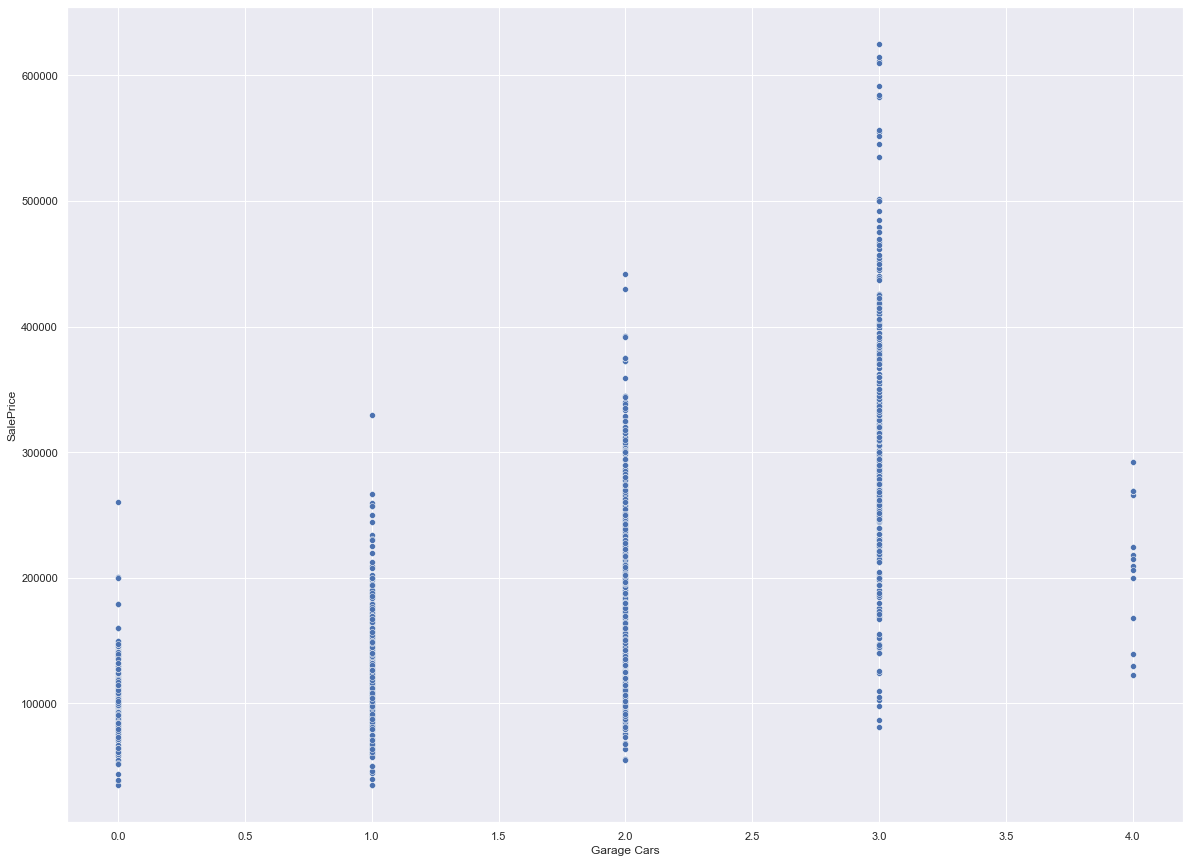

In [57]:
sns.scatterplot(x='Garage Cars',y='SalePrice',data=df)

#### Nota:
- Observamos el outlier de Garage Cars = 5 y SalePrice < 200.000. Garage muy grnde para el precio.
- Observamos el outlier de Garage Cars = 4 y SalePrice > 400.000. Precio elevado por la cantidad de garage.
- Observamos el outlier de Garage Cars = 2 y SalePrice < 40.000. Precio demasiado barato.

In [58]:
df[(df['Garage Cars']>4) & (df['SalePrice']<200000)][['SalePrice', 'Garage Cars']]

,SalePrice,Garage Cars
PID,,


In [ ]:
df[(df['Garage Cars']==4) & (df['SalePrice']>400000)][['SalePrice', 'Garage Cars']]

In [ ]:
df[(df['Garage Cars']==2) & (df['SalePrice']<40000)][['SalePrice', 'Garage Cars']]

#### Eliminar Outliers
- Como vimos en las tablas anteriores, los PID se repiten entre las comparaciones de Overall Qual y Gr Liv Area. Es muy probable que esos regitros hayan sido erroneos.
- Procedemos a eliminarlos y volver a graficar el ScatterPlot.
- Realizamos análisis de Outliers nuevamente.

In [16]:
#Eliminamos los outliers de Gr Liv Area:
index_drop=df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000) ].index
df=df.drop(index_drop, axis=0)

index_drop=df[(df['Gr Liv Area']>4000) & (df['SalePrice']>700000) ].index
df=df.drop(index_drop, axis=0)

In [19]:
#Eliminamos los outliers de Overall Qual:
index_drop=df[(df['Overall Qual']==6) & (df['SalePrice']>400000) ].index
df=df.drop(index_drop, axis=0)
index_drop=df[(df['Overall Qual']==8 ) & (df['SalePrice']>500000) ].index
df=df.drop(index_drop, axis=0)
index_drop=df[(df['Overall Qual']==9 ) & (df['SalePrice']<200000) ].index
df=df.drop(index_drop, axis=0)

In [ ]:
#Eliminamos los outliers de Garage Cars:
index_drop=df[(df['Garage Cars']>4) & (df['SalePrice']<200000) ].index
df=df.drop(index_drop, axis=0)
index_drop=df[(df['Garage Cars']==4) & (df['SalePrice']>400000) ].index
df=df.drop(index_drop, axis=0)
index_drop=df[(df['Garage Cars']==2) & (df['SalePrice']<40000) ].index
df=df.drop(index_drop, axis=0)

### + Validación luego de eliminación de Outliers

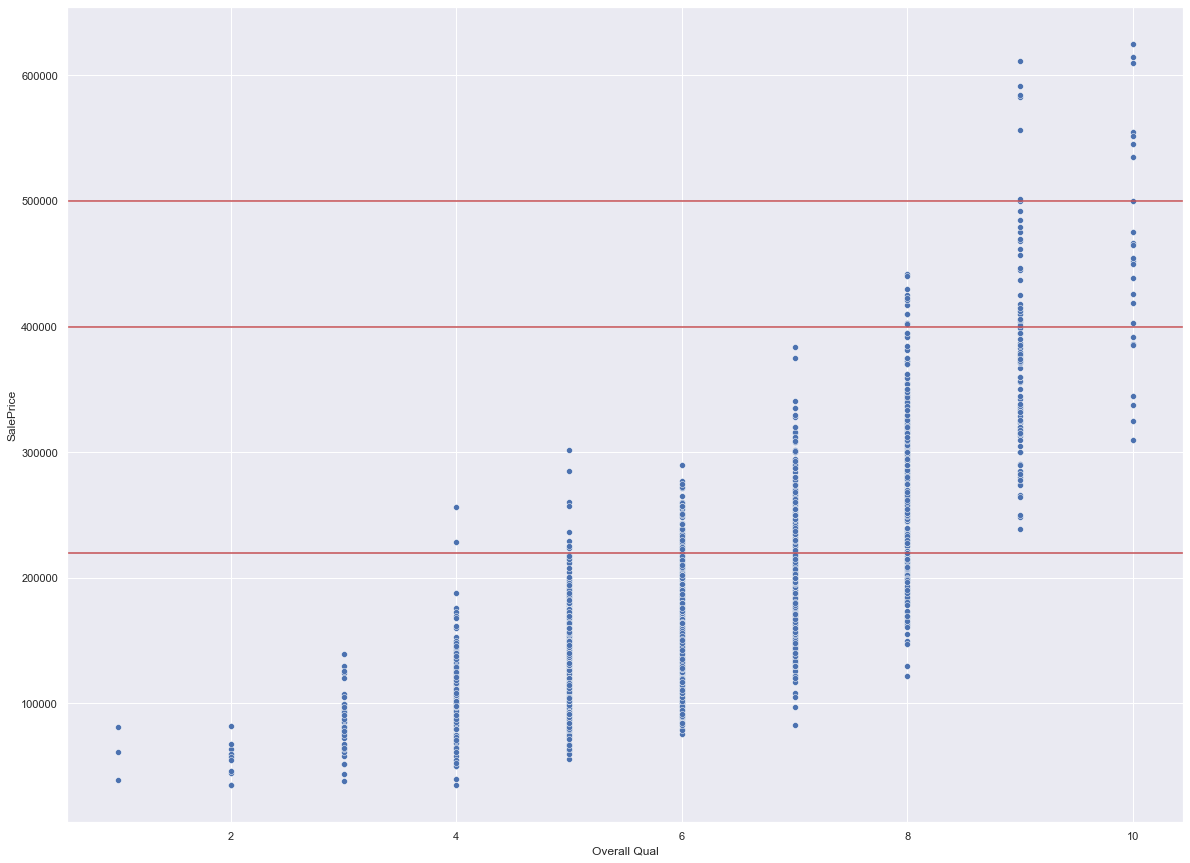

In [60]:
sns.scatterplot(data=df , x='Overall Qual',y='SalePrice')
plt.axhline(y=220000,color='r')
plt.axhline(y=400000,color='r')
plt.axhline(y=500000,color='r')

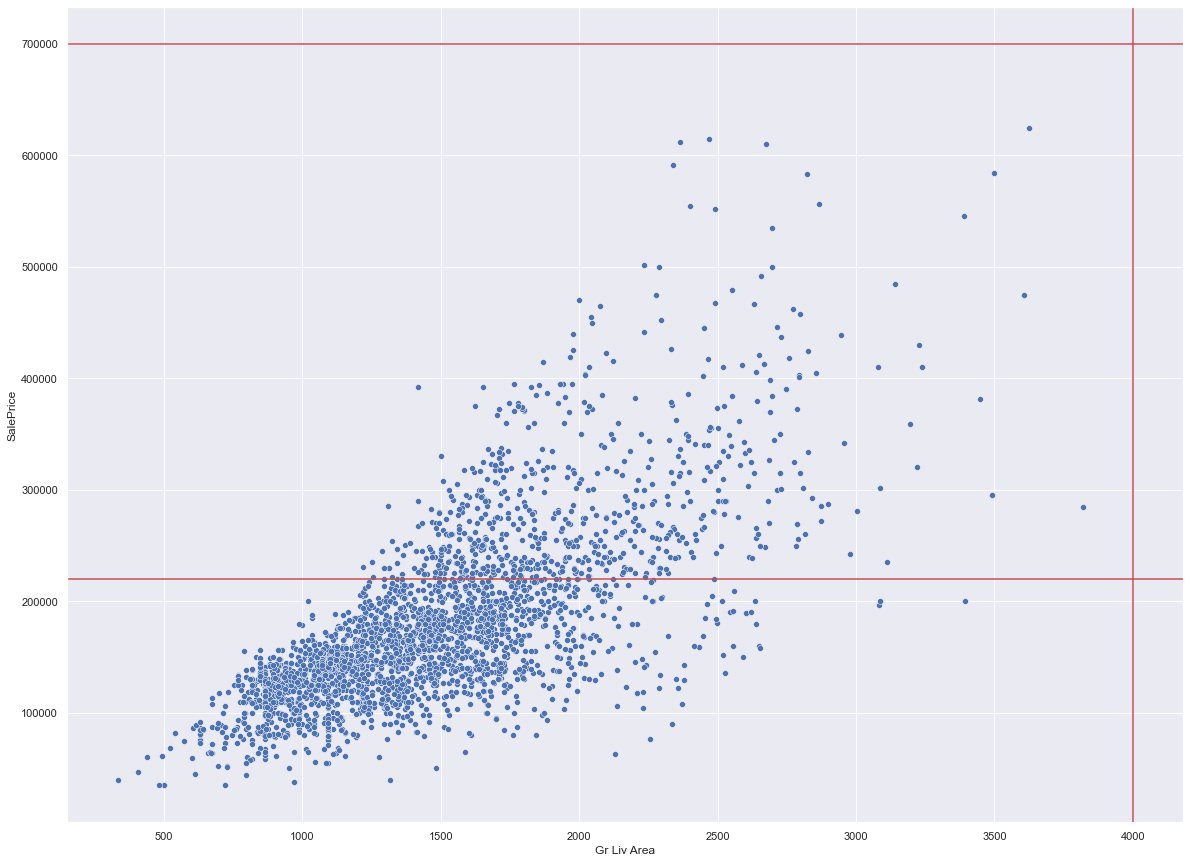

In [59]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.axhline(y=220000, color='r')
plt.axvline(x=4000, color='r')
plt.axhline(y=700000, color='r')

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

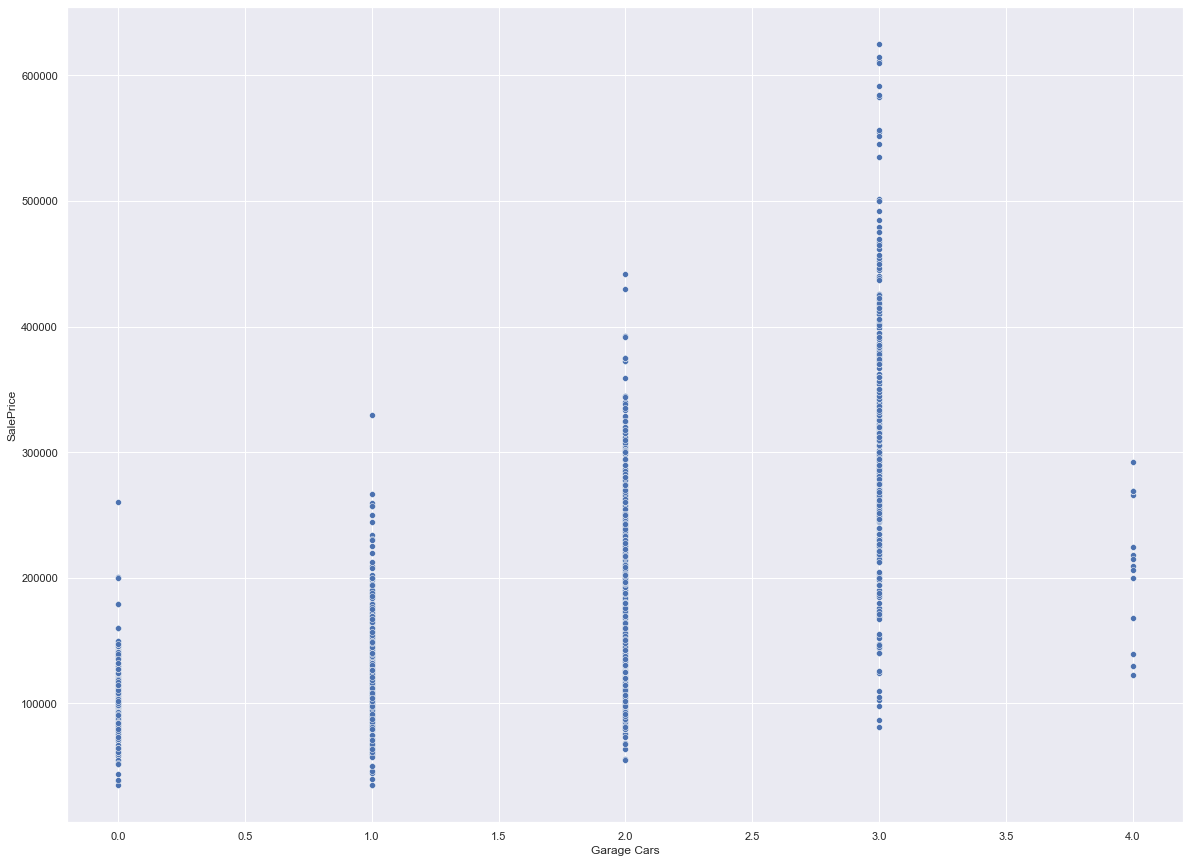

In [27]:
sns.scatterplot(x='Garage Cars',y='SalePrice',data=df)

### Missing Data
- Realizamos análisis exhaustivo de los datos faltantes.
- Dependiendo cada caso con los datos faltantes podemos:
    - Mantenerlos.
    - Borrarlos.
    - Reemplazarlos por otro valor.

In [28]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
526301100,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
526350040,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
526351010,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
526353030,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
527105010,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [29]:
#Realiza sumatoria de valores nulos por columna.
pd.options.display.max_rows = None
df.isnull().sum().sort_values()

MS SubClass           0
Sale Condition        0
Central Air           0
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
TotRms AbvGrd         0
Functional            0
Fireplaces            0
Paved Drive           0
Wood Deck SF          0
Open Porch SF         0
Enclosed Porch        0
3Ssn Porch            0
Screen Porch          0
Pool Area             0
Misc Val              0
Mo Sold               0
Yr Sold               0
Sale Type             0
Heating               0
Foundation            0
Heating QC            0
Condition 2           0
Overall Cond          0
Overall Qual          0
House Style           0
Bldg Type             0
Exter Cond            0
Condition 1           0
Neighborhood          0
Land Slope            0
Lot Config            0
Utilities             0
Land Contour          0
Lot Shape       

In [64]:
#Realiza el calculo porcentual de los nulos, castea los que son 0 y los ordena de menor a mayor.
null_porciento = 100*(df.isnull().sum()/len(df))
null_porciento = null_porciento[null_porciento>0].sort_values()
null_porciento

Lot Frontage    16.769547
dtype: float64

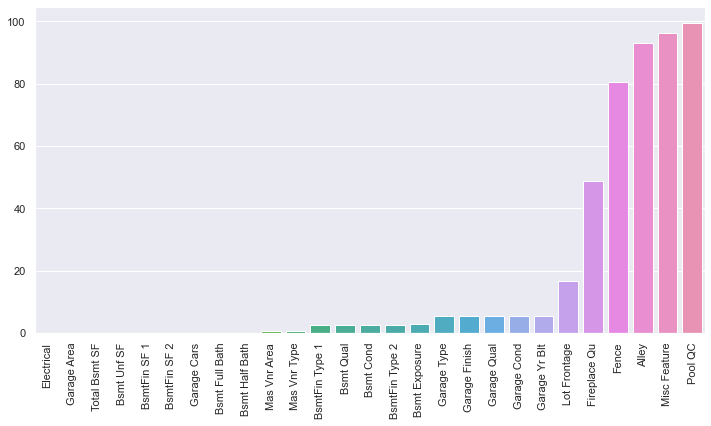

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=null_porciento.index, y=null_porciento)
plt.xticks(rotation=90)
plt.show()

### Nota: 
- Comenzamos analizando los missing <1%. Dado que son pocos los miramos en detalle para dar una solución individual.
- Se continua con los missing que comprenden de >2% y <17%. Se verifica casos particulares.
- Se finaliza con los missing >80%. Si no se pueden completar se dropean.

#### Columnas Electrical, Garage Area, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 1 y BsmtFin SF 2.
- Suponemos que las columnas Garage vacias corresponden a que son viviendas sin Garage.

In [32]:
#Electrical: Electrical system
#       SBrkr	Standard Circuit Breakers & Romex
#       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
#       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
#       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
#       Mix	Mixed

df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [33]:
#Al no conocer el tipo de sistema eléctrico de la casa procedemos a borrar el registro.
df= df.dropna(axis=0, subset=['Electrical'])

In [34]:
#Garage Area y Garage Cars
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [35]:
#Al no tener información al respecto procedemos a borrar el registro.
df= df.dropna(axis=0, subset=['Garage Area'])

In [36]:
#Total Bsmt SF (Total square feet of basement area) (Pies total de area SOTANO)
#Tambien observamos que los null unitarios Bsmt Unf SF, BsmtFin SF 1 y BsmtFin SF 2 provienen de este mismo registro.
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [37]:
#Baños chicos en sotano. Si no hay sotano no hay baños chicos. O tal vez hay sotano y no hay baño chico.
#Uno de los registros se repite con el apartado anterior.
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [38]:
#Baños completos en sotano. Si no hay sotano no hay baños completos. O tal vez hay sotano y no hay baño completo.
#Uno de los registros se repite con el apartado anterior.
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


### Notas:
- Luego de verificar los PID y la documentación, podemos estimar que los valores nulos corresponden a que la vivienda no cuenta con SOTANO. Por lo que se procede a rellenar con 0 los valores numéricos y None los valores String.

In [39]:
#Columnas numéricas se rellenan con 0:
bsmt_num_cols= ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF' ,'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols]=df[bsmt_num_cols].fillna(0)

#Columnas String se rellenan con None:
bsmt_str_cols= ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols]= df[bsmt_str_cols].fillna('None')

In [40]:
#Chequeamos nuevamente los nulls y continuamos.
null_porciento = 100*(df.isnull().sum()/len(df))
null_porciento = null_porciento[null_porciento>0].sort_values()
null_porciento

Mas Vnr Type      0.788752
Mas Vnr Area      0.788752
Garage Type       5.384088
Garage Yr Blt     5.418381
Garage Finish     5.418381
Garage Qual       5.418381
Garage Cond       5.418381
Lot Frontage     16.769547
Fireplace Qu     48.628258
Fence            80.452675
Alley            93.209877
Misc Feature     96.399177
Pool QC          99.622771
dtype: float64

In [41]:
#Mas Vnr Type y Mas Vnr Area
df[df['Mas Vnr Type'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
528240070,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
528275160,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
531371050,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
907260030,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
528290090,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
528439010,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
528462040,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
528480160,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0

### Notas:
- Observando la documentación deducimos que valores faltantes de Mas Vnr Type corresponden a que la vivienda no cuenta con revestimiento de mamposteria. Por lo que rellenamos los valores por 0 y None respectivamente.

In [42]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df["Mas Vnr Area"].fillna(0)

In [43]:
#Chequeamos nuevamente los nulls y continuamos.
null_porciento = 100*(df.isnull().sum()/len(df))
null_porciento = null_porciento[null_porciento>0].sort_values()
null_porciento

Garage Type       5.384088
Garage Yr Blt     5.418381
Garage Finish     5.418381
Garage Qual       5.418381
Garage Cond       5.418381
Lot Frontage     16.769547
Fireplace Qu     48.628258
Fence            80.452675
Alley            93.209877
Misc Feature     96.399177
Pool QC          99.622771
dtype: float64

#### Más Columnas Garage
- Suponemos que las columnas Garage vacias corresponden a que son viviendas sin Garage.

In [44]:
Gar_str_cols= ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[Gar_str_cols]=df[Gar_str_cols].fillna('None')

df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

In [45]:
#Chequeamos nuevamente los nulls y continuamos.
null_porciento = 100*(df.isnull().sum()/len(df))
null_porciento = null_porciento[null_porciento>0].sort_values()
null_porciento

Lot Frontage    16.769547
Fireplace Qu    48.628258
Fence           80.452675
Alley           93.209877
Misc Feature    96.399177
Pool QC         99.622771
dtype: float64

#### Columnas Lot Frontage (Frente de vivienda)

In [46]:
#Frente de vivienda en medida pies lineales.
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,185000
527182190,120,RL,NaN,6820,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1985,1985,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,368.0,BLQ,1120.0,0.0,1488.0,GasA,TA,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,1985.0,RFn,2.0,528.0,TA,TA,Y,0,54,0,0,140,0,NaN,NaN,NaN,0,6,2010,WD,Normal,212000
527368020,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,533.0,Unf,0.0,281.0,814.0,GasA,Ex,Y,SBrkr,814,860,0,1674,1.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2000.0,RFn,2.0,663.0,TA,TA,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Normal,216000
527402200,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578.0,Unf,0.0,426.0,1004.0,GasA,Ex,Y,SBrkr,1004,0,0,1004,1.0,0.0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
527402250,20,RL,NaN,12537,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1971,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,734.0,Unf,0.0,344.0,1078.0,GasA,Ex,Y,SBrkr,1078,0,0,1078,1.0,0.0,1,1,3,1,TA,6,Typ,1,Fa,Attchd,1971.0,Fin,2.0,500.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,149900
528240070,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
528250100,80,RL,NaN,7750,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,250.0,Unf,0.0,134.0,384.0,GasA,Ex,Y,SBrkr,774,656,0,1430,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,2000.0,Fin,2.0,400.0,TA,TA,Y,180,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,180000
528292020,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,180.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,884.0,884.0,GasA,Ex,Y,SBrkr,884,1151,0,2035,0.0,0.0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2001.0,Fin,2.0,434.0,TA,TA,Y,144,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500
531380080,60,RL,NaN,8880,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1994,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,695.0,Unf,0.0,253.0,948.0,GasA,Ex,Y

In [47]:
df[df['Lot Frontage'].isnull()]['Neighborhood'].value_counts()

NAmes      68
Gilbert    54
Sawyer     53
CollgCr    47
NWAmes     46
ClearCr    24
Mitchel    24
Somerst    20
Crawfor    20
SawyerW    19
NoRidge    17
Edwards    16
Timber     15
BrkSide    13
OldTown    10
Blmngtn     8
Veenker     7
IDOTRR      6
StoneBr     5
SWISU       4
MeadowV     4
NridgHt     3
GrnHill     2
NPkVill     2
Greens      1
Landmrk     1
Name: Neighborhood, dtype: int64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

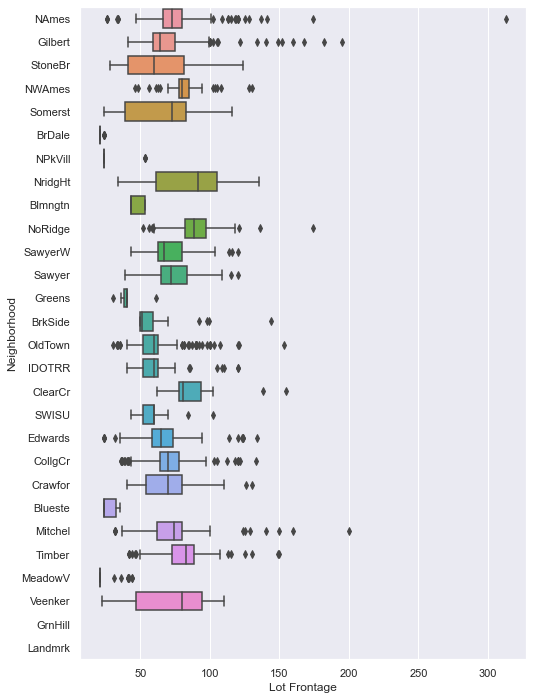

In [48]:
plt.figure(figsize=(8,12))
sns.boxplot(data=df, x='Lot Frontage', y='Neighborhood')

In [49]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.851064
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.821839
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.176471
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    90.076923
NridgHt    84.111111
OldTown    61.750000
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.511111
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [50]:
medio = df[df['Neighborhood']=='Blmngtn']['Lot Frontage'].mean()
medio

46.9

In [51]:
####### HACER FUNCION PARA CADA NEIGHBORHOOD con una lista. JOSE vos sos crack en los for jaja.
#for i in df['Neighborhood'].columns:
    
#Con esta funcion llego el NA con el valor medio del barrio. Pero solo para un barrio.
df[df['Neighborhood']=='Blmngtn']['Lot Frontage'].fillna(df[df['Neighborhood']=='Blmngtn']['Lot Frontage'].mean())

PID
528228285    43.0
528228440    43.0
528228290    53.0
528228295    51.0
528228435    43.0
528228450    43.0
528228455    43.0
528228460    43.0
528228345    46.9
528228405    46.9
528228445    43.0
528228465    43.0
528228540    53.0
528228270    53.0
528228275    53.0
528228375    46.9
528228555    53.0
528228280    43.0
528228325    46.9
528228340    46.9
528228360    46.9
528228415    46.9
528228430    46.9
528228545    43.0
528228550    43.0
528228565    43.0
528228575    53.0
528228580    53.0
Name: Lot Frontage, dtype: float64

#### Columna Fireplace Qu: Calidad de hogar a leña.
- Se supone que si no hay hogar a leña, la calidad del hogar a leña es None.

In [52]:
#Filling in Fireplace Quality based on dataset documentation:
df['Fireplace Qu']= df['Fireplace Qu'].fillna('None')

#### Columnas Fence, Alley, Misc Feature y Pool QC.
- Dado que estas columnas presentan <80 % de datos faltantes se descartan. 

In [53]:
df= df.drop(['Fence', 'Alley', 'Misc Feature','Pool QC'], axis=1)

### Chequeo de valores NULL

In [54]:
#Chequeamos nuevamente los nulls y continuamos.
null_porciento = 100*(df.isnull().sum()/len(df))
null_porciento = null_porciento[null_porciento>0].sort_values()
null_porciento

Lot Frontage    16.769547
dtype: float64

<AxesSubplot:>

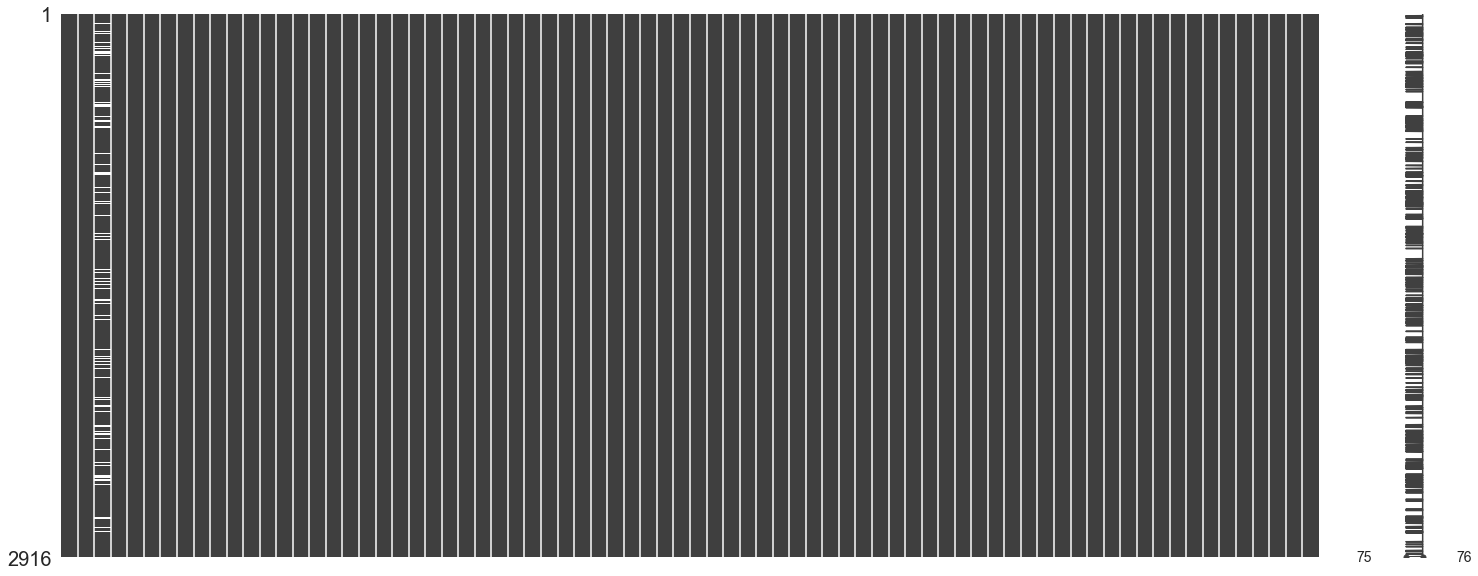

In [65]:
#Utilizacion de libreria missingno para visualizar valores NULL.
msno.matrix(df)

<AxesSubplot:>

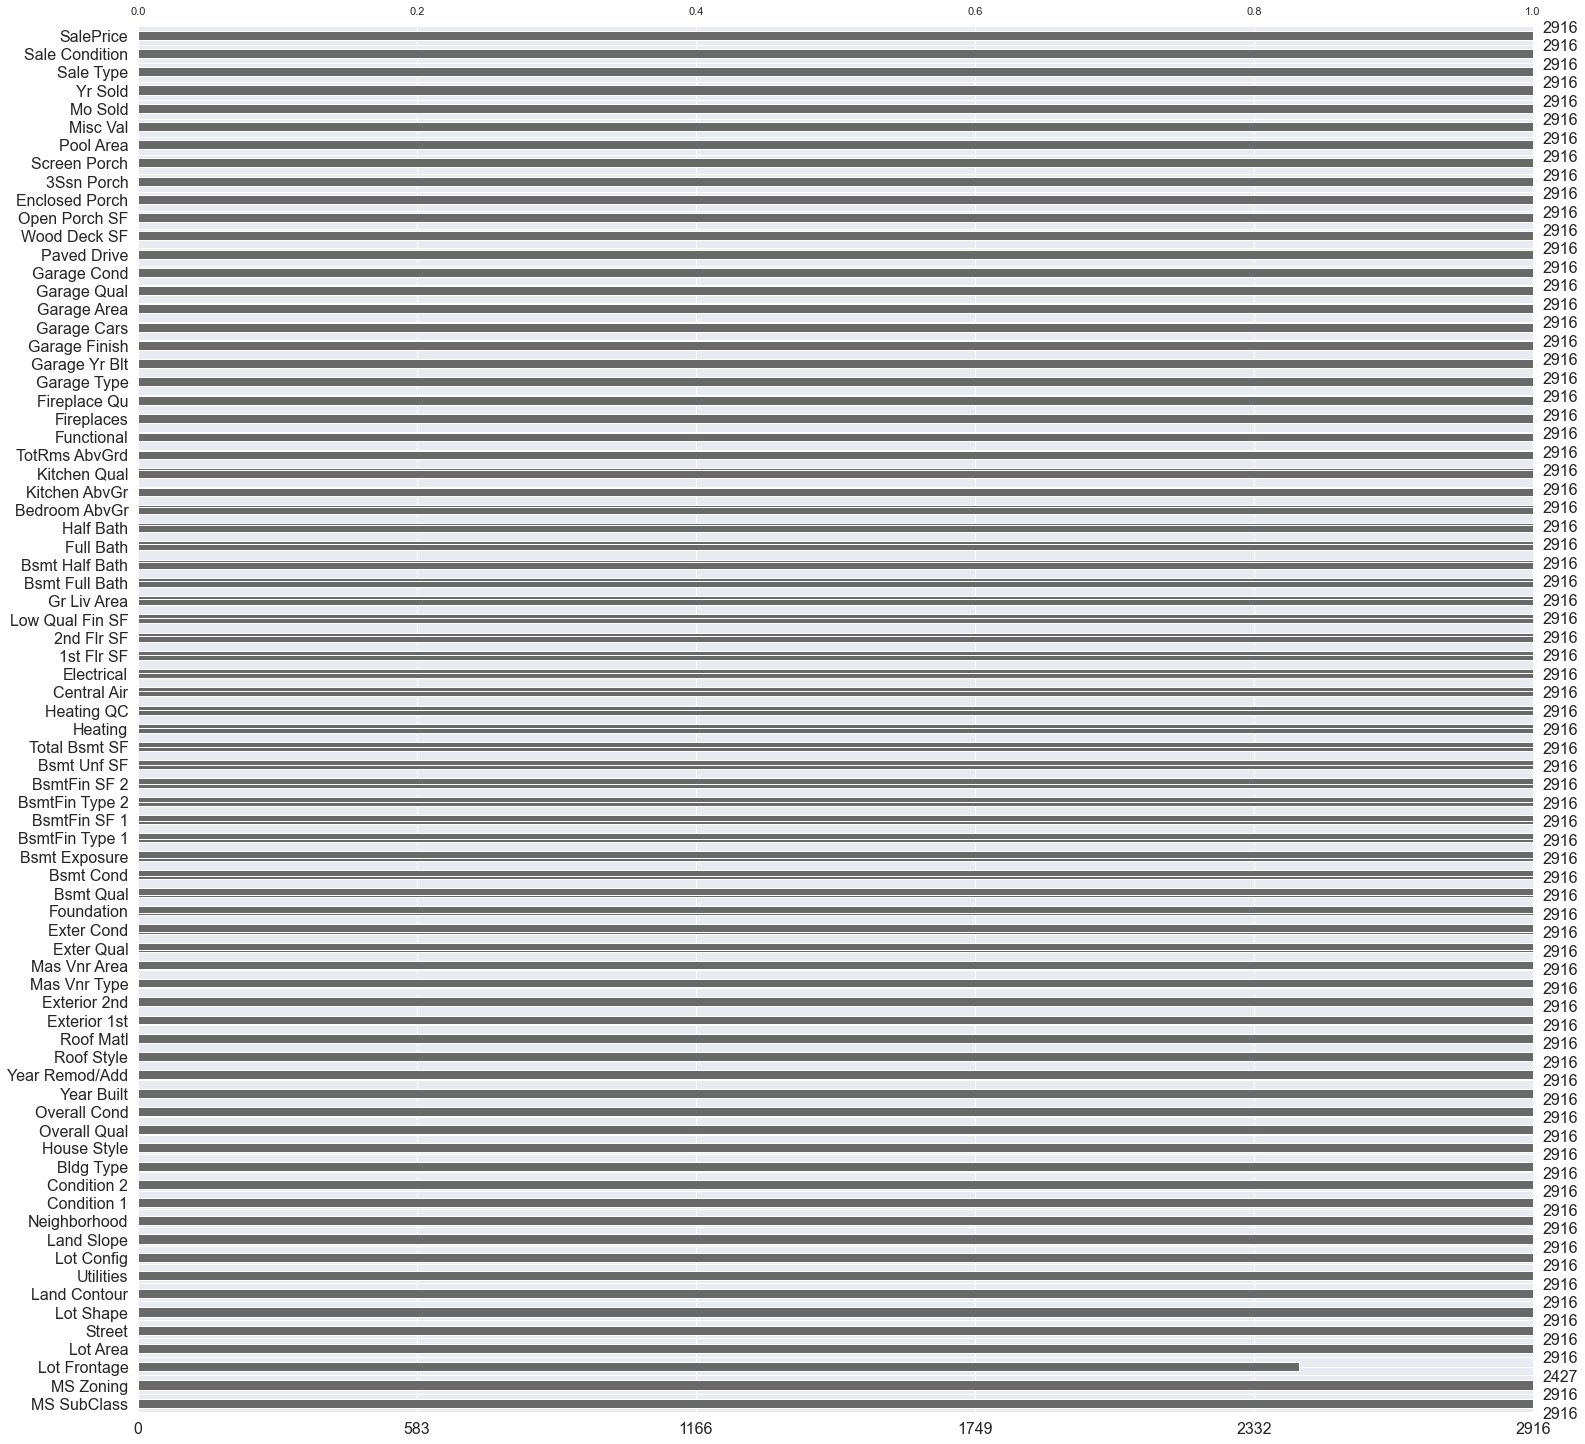

In [66]:
msno.bar(df)